## RNN Cell

In [1]:
# import torch
# #import torchtext
# import numpy as np
# import torch.nn as nn
# import torch.nn.functional as F
# import time

In [2]:
# start=time.time()
# TEXT = torchtext.legacy.data.Field(lower=True, fix_length=200, batch_first=False)
# LABEL = torchtext.legacy.data.Field(sequential=False)

In [3]:
# from torchtext.legacy import datasets
# train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [4]:
# print(vars(train_data.examples[0]))

In [5]:
# import string

# for example in train_data.examples:
#     text = [x.lower() for x in vars(example)['text']] 
#     text = [x.replace("<br","") for x in text] 
#     text = [''.join(c for c in s if c not in string.punctuation) for s in text] 
#     text = [s for s in text if s] 
#     vars(example)['text'] = text
    
# for example in test_data.examples:
#     text = [x.lower() for x in vars(example)['text']]
#     text = [x.replace("<br","") for x in text]
#     text = [''.join(c for c in s if c not in string.punctuation) for s in text]
#     text = [s for s in text if s]
#     vars(example)['text'] = text

In [6]:
# import random
# train_data, valid_data = train_data.split(random_state = random.seed(0), split_ratio=0.8)

In [7]:
# print(f'Number of training examples: {len(train_data)}')
# print(f'Number of validation examples: {len(valid_data)}')
# print(f'Number of testing examples: {len(test_data)}')

In [8]:
# TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
# LABEL.build_vocab(train_data)

# print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
# print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

In [9]:
#print(LABEL.vocab.stoi)

In [10]:
# BATCH_SIZE = 64
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# embeding_dim = 100
# hidden_size = 300

# train_iterator, valid_iterator, test_iterator = torchtext.legacy.data.BucketIterator.splits(
#     (train_data, valid_data, test_data), 
#     batch_size = BATCH_SIZE,
#     device = device)

In [11]:
# class RNNCELL_Encoder(nn.Module):
#     def __init__(self, input_dim, hidden_size):
#         super(RNNCELL_Encoder, self).__init__()
#         self.rnn = nn.RNNCELL(input_dim, hidden_size)
        
#     def forward(self, inputs):
#         bz = inputs.shape[1]
#         ht = torch.zeros((bz,hidden_size)).to(device)
#         for word in inputs:
#             ht =self.rnn(word, ht)
#         return ht
    
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.em = nn.Embedding(len(TEXT.vocab.stoi), embedding_dim)
#         self.rnn = RNNCELL_Encoder(embediing_dim, hidden_size)
#         self.fc1 = nn.Linear(Hidden_size,256)
#         self.fc2 = nn.Linear(256,3)
        
#     def forward(self,x):
#         x=self.em(x)
#         x=self.rnn(x)
#         x=F.relu(self.fc1(x))
#         x=self.fc2(x)
#         return x

In [12]:
# model = Net()
# model.to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [13]:
# def training(epoch, model, trainloader, validloader):
#     correct = 0
#     total = 0
#     running_loss = 0

#     model.train()
#     for b in trainloader:
#         x, y = b.text, b.label
#         x, y = x.to(device), y.to(device)
#         y_pred = model(x)
#         loss = loss_fn(y_pred, y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         with torch.no_grad():
#             y_pred = torch.argmax(y_pred, dim=1)
#             correct += (y_pred == y).sum().item()
#             total += y.size(0)
#             running_loss += loss.item()
#     epoch_loss = running_loss / len(trainloader.dataset)
#     epoch_acc = correct / total

#     valid_correct = 0
#     valid_total = 0
#     valid_running_loss = 0

#     model.eval()
#     with torch.no_grad():
#         for b in validloader:
#             x, y = b.text, b.label
#             x, y = x.to(device), y.to(device)
#             y_pred = model(x)
#             loss = loss_fn(y_pred, y)
#             y_pred = torch.argmax(y_pred, dim=1)
#             valid_correct += (y_pred == y).sum().item()
#             valid_total += y.size(0)
#             valid_running_loss += loss.item()

#     epoch_valid_loss = valid_running_loss / len(validloader.dataset)
#     epoch_valid_acc = valid_correct / valid_total

#     print('epoch: ', epoch,
#           'loss： ', round(epoch_loss, 3),
#           'accuracy:', round(epoch_acc, 3),
#           'valid_loss： ', round(epoch_valid_loss, 3),
#           'valid_accuracy:', round(epoch_valid_acc, 3)
#           )
#     return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [14]:
# epochs = 5
# train_loss = []
# train_acc = []
# valid_loss = []
# valid_acc = []

# for epoch in range(epochs):
#     epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,model,train_iterator,valid_iterator)
#     train_loss.append(epoch_loss)
#     train_acc.append(epoch_acc)
#     valid_loss.append(epoch_valid_loss)
#     valid_acc.append(epoch_valid_acc)

# end = time.time()
# print(end-start)

In [15]:
# def evaluate(epoch, model, testloader):    
#     test_correct = 0
#     test_total = 0
#     test_running_loss = 0
    
#     model.eval()
#     with torch.no_grad():
#         for b in testloader:
#             x, y = b.text, b.label
#             x, y = x.to(device), y.to(device)
#             y_pred = model(x)
#             loss = loss_fn(y_pred, y)
#             y_pred = torch.argmax(y_pred, dim=1)
#             test_correct += (y_pred == y).sum().item()
#             test_total += y.size(0)
#             test_running_loss += loss.item()

#     epoch_test_loss = test_running_loss / len(testloader.dataset)
#     epoch_test_acc = test_correct / test_total

#     print('epoch: ', epoch,
#           'test_loss： ', round(epoch_test_loss, 3),
#           'test_accuracy:', round(epoch_test_acc, 3)
#           )
#     return epoch_test_loss, epoch_test_acc

In [16]:
# epochs = 5
# test_loss = []
# test_acc = []

# for epoch in range(epochs):
#     epoch_test_loss, epoch_test_acc = evaluate(epoch,
#                                                model,
#                                                test_iterator)
#     test_loss.append(epoch_test_loss)
#     test_acc.append(epoch_test_acc)

# end = time.time()
# print(end-start)

## RNN Network

In [17]:
# import torch
# #import torchtext
# import numpy as np
# import torch.nn as nn
# import torch.nn.functional as F
# import time

In [18]:
# start=time.time()

# TEXT = torchtext.legacy.data.Field(sequential = True, batch_first = True, lower = True)
# LABEL = torchtext.legacy.data.Field(sequential = False, batch_first = True) 

# from torchtext.legacy import datasets
# train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
# train_data, valid_data = train_data.split(split_ratio = 0.8)

# TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
# LABEL.build_vocab(train_data)

# BATCH_SIZE = 100
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [19]:
# train_iterator, valid_iterator, test_iterator = torchtext.legacy.data.BucketIterator.splits(
#     (train_data, valid_data, test_data), 
#     batch_size = BATCH_SIZE,
#     device = device)

In [20]:
# vocab_size = len(TEXT.vocab)
# n_classes = 2  

In [21]:
# class BasicRNN(nn.Module):
#     def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
#         super(BasicRNN, self).__init__()
#         self.n_layers = n_layers
#         self.embed = nn.Embedding(n_vocab, embed_dim)
#         self.hidden_dim = hidden_dim
#         self.dropout = nn.Dropout(dropout_p)
#         self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers = self.n_layers, batch_first=True)
#         self.out = nn.Linear(self.hidden_dim, n_classes)
        
#     def forward(self,x):
#         x = self.embed(x)
#         h_0 = self._init_state(batch_size=x.size(0))
#         x, _ = self.rnn(x, h_0)
#         h_t = x[:,-1,:]
#         self.dropout(h_t)
#         logit = torch.sigmoid(self.out(h_t))
#         return logit
    
#     def _init_state(self, batch_size=1):
#         weight = next(self.parameters()).data
#         return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [22]:
# model = BasicRNN(n_layers = 1, hidden_dim = 256, n_vocab = vocab_size, embed_dim = 128, n_classes = n_classes, dropout_p = 0.5)
# model.to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [23]:
# def train(model, optimizer, train_iter):
#     model.train()
#     for b, batch in enumerate(train_iter):
#         x, y = batch.text.to(device), batch.label.to(device)
#         y.data.sub_(1)
#         optimizer.zero_grad()

#         logit = model(x)
#         loss = F.cross_entropy(logit, y)
#         loss.backward()
#         optimizer.step()

#         if b % 50 == 0:
#             print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(e,
#                                                                            b * len(x),
#                                                                            len(train_iter.dataset),
#                                                                            100. * b / len(train_iter),
#                                                                            loss.item()))

In [24]:
# def evaluate(model, val_iter):
#     model.eval()
#     corrects, total, total_loss = 0, 0, 0

#     for batch in val_iter:
#         x, y = batch.text.to(device), batch.label.to(device)
#         y.data.sub_(1) 
#         logit = model(x)
#         loss = F.cross_entropy(logit, y, reduction = "sum")
#         total += y.size(0)
#         total_loss += loss.item()
#         corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        
#     avg_loss = total_loss / len(val_iter.dataset)
#     avg_accuracy = corrects / total
#     return avg_loss, avg_accuracy

In [25]:
# BATCH_SIZE = 100
# LR = 0.001
# EPOCHS = 5
# for e in range(1, EPOCHS + 1):
#     train(model, optimizer, train_iterator)
#     val_loss, val_accuracy = evaluate(model, valid_iterator)
#     print("[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f" % (e, val_loss, val_accuracy))

In [26]:
# test_loss, test_acc = evaluate(model,test_iterator)
# print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

## LSTM

In [27]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

C:\Users\Seungyun\anaconda3\envs\torch_book\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Seungyun\anaconda3\envs\torch_book\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [28]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
])

In [29]:
from torchvision.datasets import MNIST

download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [30]:
batch_size =64
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                        batch_size = batch_size,
                        shuffle=True)

In [31]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters/(len(train_dataset)/batch_size)
num_epochs = int(num_epochs)

In [32]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4*hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4*hidden_size, bias=bias)
        self.reset_parameters()
    
    def reset_parameters(self):
        std = 1.0/math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std,std)
            
    def forward(self,x,hidden):
        hx,cx = hidden
        x = x.view(-1,x.size(1))
        
        gates = self.x2h(x) + self.h2h(hx)
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4,1)
        
        ingate = F.sigmoid(ingate)
        forgetgate = F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        
        cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate)
        hy = torch.mul(outgate, F.tanh(cy))
        return hy,cy

In [33]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        outs = []
        cn = c0[0,:,:]
        hn = h0[0,:,:]
        
        for seq in range(x.size(1)):
            hn,cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)
            
        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [34]:
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [35]:
seq_dim = 28
loss_list = []
iter = 0

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1,seq_dim, input_dim))
            labels = Variable(labels)
            
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        if torch.cuda.is_available():
            loss.cuda()
            
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        iter+=1
        
        if iter % 500 == 0 :
            correct = 0
            total = 0
            for images, labels in valid_loader:
                
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1,seq_dim, input_dim))
                
                outputs = model(images)
                _,predicted = torch.max(outputs.data,1)
                
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
                    
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

C:\Users\Seungyun\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Seungyun\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Iteration: 500. Loss: 2.237457513809204. Accuracy: 21.420000076293945
Iteration: 1000. Loss: 0.8247257471084595. Accuracy: 76.13999938964844
Iteration: 1500. Loss: 0.4205913841724396. Accuracy: 89.0199966430664
Iteration: 2000. Loss: 0.25726011395454407. Accuracy: 93.01000213623047
Iteration: 2500. Loss: 0.06256351619958878. Accuracy: 95.5
Iteration: 3000. Loss: 0.0712197944521904. Accuracy: 96.27999877929688
Iteration: 3500. Loss: 0.1383725106716156. Accuracy: 96.58000183105469
Iteration: 4000. Loss: 0.04504479095339775. Accuracy: 96.54000091552734
Iteration: 4500. Loss: 0.05652716010808945. Accuracy: 97.16000366210938
Iteration: 5000. Loss: 0.06691935658454895. Accuracy: 97.33000183105469
Iteration: 5500. Loss: 0.12820550799369812. Accuracy: 97.3499984741211
Iteration: 6000. Loss: 0.013683550991117954. Accuracy: 97.80000305175781
Iteration: 6500. Loss: 0.031900353729724884. Accuracy: 97.4800033569336
Iteration: 7000. Loss: 0.016825499013066292. Accuracy: 98.0199966430664
Iteration: 7

In [36]:
def evaluate(model, val_iter):
    corrects, total, total_loss = 0,0,0
    model.eval()
    
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1,seq_dim,input_dim).cuda())
        else:
            images = Variable(images.view(-1,seq_dim, input_dim))
            
        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = 'sum')
        _, predicted = torch.max(logit.data,1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted==labels).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [37]:
test_loss, test_acc = evaluate(model, test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


In [38]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [39]:
data = pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [40]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [41]:
data['Volume'] = data['Volume'].astype(float)

In [42]:
X = data.iloc[:,:-1]
y = data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [43]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:,:]

y_train = y_ms[:200,:]
y_test = y_ms[200:,:]

print('Training Shape', X_train.shape, y_train.shape)
print('Testing Shape', X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [44]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape', X_train_tensors_f.shape, y_train_tensors.shape)
print('Testing Shape', X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [45]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size,128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn,cn) = self.lstm(x, (h_0,c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [46]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [47]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors) 
    loss.backward() 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.18287
Epoch: 100, loss: 0.05713
Epoch: 200, loss: 0.03855
Epoch: 300, loss: 0.03717
Epoch: 400, loss: 0.03599
Epoch: 500, loss: 0.03326
Epoch: 600, loss: 0.02937
Epoch: 700, loss: 0.02517
Epoch: 800, loss: 0.02214
Epoch: 900, loss: 0.02043


In [48]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

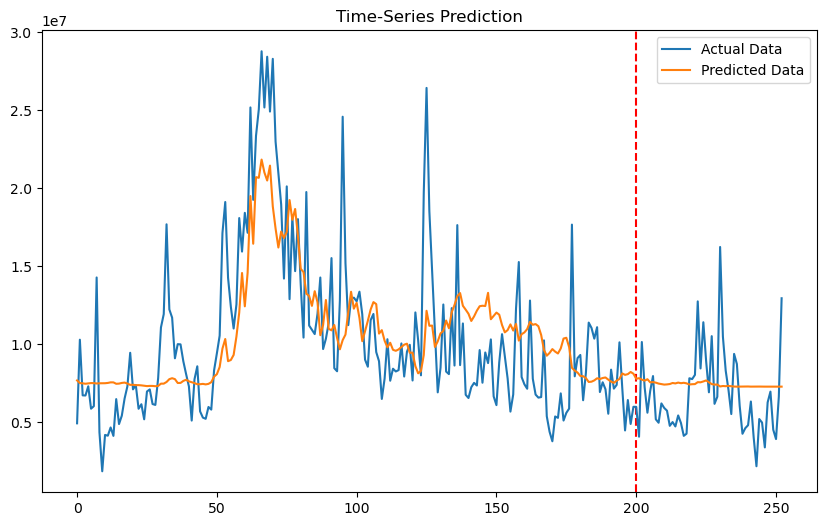

In [49]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

## GRU

In [50]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
    
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor    

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [51]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))
])

In [52]:
from torchvision.datasets import MNIST
download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [53]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

In [54]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [55]:
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias =True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 3*hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 3*hidden_size, bias=bias)
        self.reset_parameters()
        
    def reset_parameters(self):
        std =1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std,std)
            
    def forward(self, x, hidden):
        x = x.view(-1, x.size(1))
        
        gate_x = self.x2h(x)
        gate_h = self.h2h(hidden)
        gate_x = gate_x.squeeze()
        gate_h = gate_h.squeeze()
        
        i_r, i_i, i_n = gate_x.chunk(3,1)
        h_r, h_i, h_n = gate_h.chunk(3,1)
        
        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_i + h_i)
        newgate = F.tanh(i_n + (resetgate*h_n))
        
        hy = newgate + inputgate * (hidden - newgate)
        return hy

In [56]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias =True):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.gru_cell = GRUCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        outs = []
        hn = h0[0,:,:]
        
        for seq in range(x.size(1)):
            hn = self.gru_cell(x[:,seq,:], hn)
            outs.append(hn)
            
        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [57]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  
output_dim = 10
 
model = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)
 
if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
seq_dim = 28 
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):         
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
          
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        iter += 1
         
        if iter % 500 == 0:         
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
             
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

C:\Users\Seungyun\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Seungyun\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Iteration: 500. Loss: 1.661692500114441. Accuracy: 43.59000015258789
Iteration: 1000. Loss: 0.8945669531822205. Accuracy: 76.19999694824219
Iteration: 1500. Loss: 0.29147768020629883. Accuracy: 89.7300033569336
Iteration: 2000. Loss: 0.23627927899360657. Accuracy: 93.51000213623047
Iteration: 2500. Loss: 0.032887253910303116. Accuracy: 95.05000305175781
Iteration: 3000. Loss: 0.030374949797987938. Accuracy: 95.81999969482422
Iteration: 3500. Loss: 0.16210585832595825. Accuracy: 96.33999633789062
Iteration: 4000. Loss: 0.19308783113956451. Accuracy: 96.19000244140625
Iteration: 4500. Loss: 0.051720019429922104. Accuracy: 97.0
Iteration: 5000. Loss: 0.13900154829025269. Accuracy: 97.26000213623047
Iteration: 5500. Loss: 0.08090292662382126. Accuracy: 97.62000274658203
Iteration: 6000. Loss: 0.1048835963010788. Accuracy: 97.69000244140625
Iteration: 6500. Loss: 0.0798400491476059. Accuracy: 97.80000305175781
Iteration: 7000. Loss: 0.10250382870435715. Accuracy: 97.55999755859375
Iteration

In [59]:
def evaluate(model, val_iter):    
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)

        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [60]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


In [61]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [62]:
data=pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [63]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

In [64]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [65]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [66]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [67]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) 
        self.fc_1 =  nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes) 
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        output, (hn) = self.gru(x, (h_0)) 
        hn = hn.view(-1, self.hidden_size) 
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out) 
        return out

In [68]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [69]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors)
    loss.backward() 
 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.11692
Epoch: 100, loss: 0.04124
Epoch: 200, loss: 0.03291
Epoch: 300, loss: 0.03008
Epoch: 400, loss: 0.02830
Epoch: 500, loss: 0.02701
Epoch: 600, loss: 0.02590
Epoch: 700, loss: 0.02486
Epoch: 800, loss: 0.02385
Epoch: 900, loss: 0.02284


In [70]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

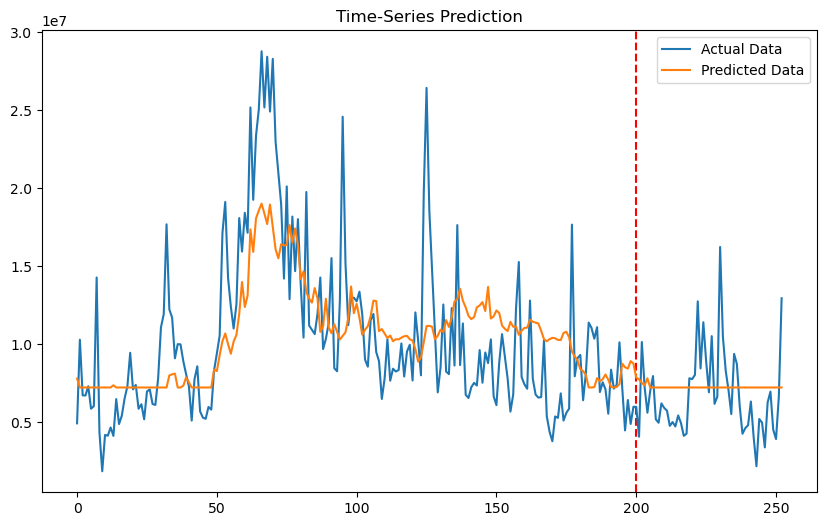

In [71]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

## 양방향 LSTM

In [72]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [73]:
data=pd.read_csv('../chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [74]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [75]:
data['Volume'] = data['Volume'].astype(float)

In [76]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [78]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [79]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True) 
        self.fc =  nn.Linear(hidden_size*2, num_classes) 
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)) 
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))                 
        out, _ = self.lstm(x, (h_0, c_0)) 
        out = self.fc(out[:, -1, :])               
        out = self.relu(out)
        return out

In [80]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [81]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad() 
 
    loss = criterion(outputs, y_train_tensors) 
    loss.backward()  
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.04069
Epoch: 100, loss: 0.03687
Epoch: 200, loss: 0.03386
Epoch: 300, loss: 0.03143
Epoch: 400, loss: 0.02948
Epoch: 500, loss: 0.02797
Epoch: 600, loss: 0.02681
Epoch: 700, loss: 0.02592
Epoch: 800, loss: 0.02522
Epoch: 900, loss: 0.02466


In [82]:
df_x_ss = ss.transform(data.iloc[:, :-1]) 
df_y_ms = ms.transform(data.iloc[:, -1:]) 

df_x_ss = Variable(torch.Tensor(df_x_ss)) 
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

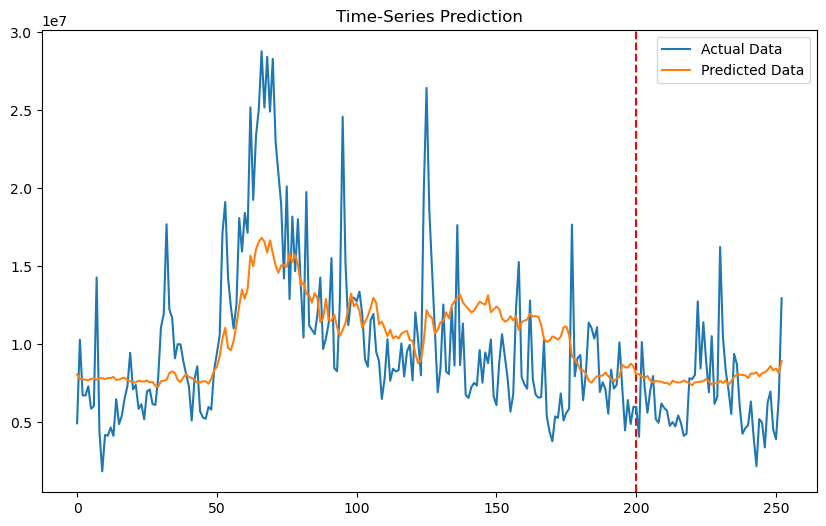

In [83]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy() 
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 